In [19]:
%matplotlib inline
import os
import re
import zipfile
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import geopandas
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
path = "ceidg_data_surv.csv"
df = pd.read_csv(path)

In [47]:
df['MainAddressVoivodeship'] = df['MainAddressVoivodeship'].str.lower()
df['MainAddressVoivodeship'].unique()
correct_voivodeships = ['dolnośląskie', 'mazowieckie','kujawsko-pomorskie','małopolskie',
                       'zachodniopomorskie', 'łódzkie', 'lubelskie', 'pomorskie',
                        'podkarpackie', 'śląskie', 'warmińsko-mazurskie', 'świętokrzyskie',
                       'podlaskie', 'wielkopolskie', 'lubuskie', 'opolskie']

correct_records = df['MainAddressVoivodeship'].isin(correct_voivodeships)

In [20]:
#próba z mapą polski

In [27]:
DATA_DIR = r'..\data\data.zip'
os.path.abspath(DATA_DIR)

'C:\\Users\\Dark\\Downloads\\cedg-company-existence-visualizer-master(1)\\cedg-company-existence-visualizer-master\\data\\data.zip'

In [35]:
woj = geopandas.read_file(r"zip://" + DATA_DIR, encoding='utf-8')

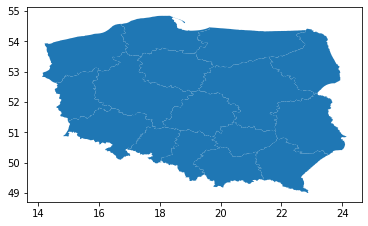

In [36]:
woj.plot()

In [37]:
woj.head(1)

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,śląskie,None,0,2017-10-10,None,2012-09-26,None,None,...,24,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."


In [60]:
woj['MainAddressVoivodeship'] = woj['JPT_NAZWA_']

In [48]:
df = df[correct_records]

In [49]:
g = df.groupby('MainAddressVoivodeship')

In [50]:
woj['count'] = woj['MainAddressVoivodeship'].map(g.size()).fillna(0).astype(int)

In [62]:
woj.head(1)

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry,count,MainAddressVoivodeship
0,WOJ,24,śląskie,None,0,2017-10-10,None,2012-09-26,None,None,...,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51...",29225,śląskie


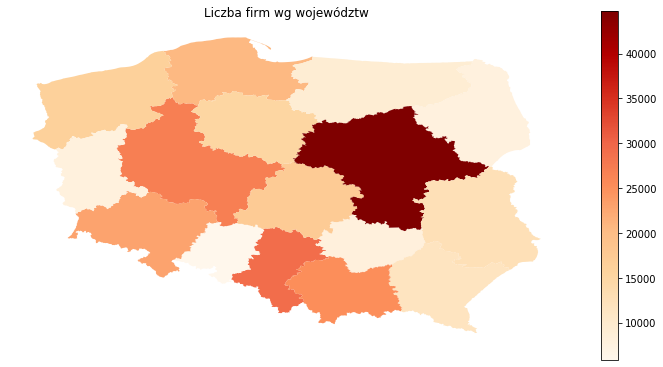

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
woj.plot(column='count', cmap='OrRd', linewidth=0.5, ax=ax)
# dodajmy legendę ręcznie (mozna też dodać legend=True, ale wtedy jest zbyt duża)
vmin, vmax = woj['count'].min(), woj['count'].max()
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, shrink=0.5, ax=ax)
ax.set_title("Liczba firm wg województw")
ax.grid(False)
ax.set_axis_off()
plt.tight_layout()
plt.show()